## 1. Setup
***
First lets import the relevant libraries and load our dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

Taking a quick look at what our training and test data sets look like, along with looking at the other files given to us contain

In [2]:
train = pd.read_csv("../SalesPrediction/competitive-data-science-predict-future-sales/sales_train.csv")
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [3]:
test = pd.read_csv("../SalesPrediction/competitive-data-science-predict-future-sales/test.csv")
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [4]:
item_cat=pd.read_csv("../SalesPrediction/competitive-data-science-predict-future-sales/item_categories.csv")
item_cat.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [5]:
items=pd.read_csv("../SalesPrediction/competitive-data-science-predict-future-sales/items.csv")
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [6]:
shops=pd.read_csv("../SalesPrediction/competitive-data-science-predict-future-sales/shops.csv")
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


Something we can already see is that our item, category and shop names are all in russian.

## 2. Data Exploration
***

Quantifying how many sales, catigories and shops we have along with what types of information we have

### Training Data

In [7]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None


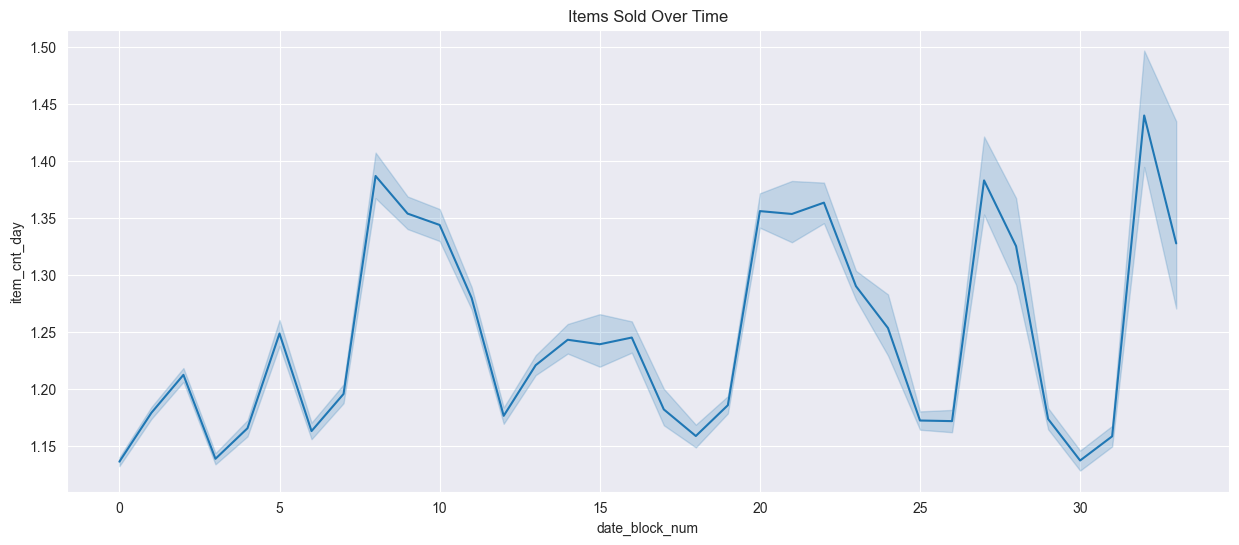

In [9]:
plt.figure(figsize=(15,6))
sns.lineplot(x='date_block_num',y='item_cnt_day',data=train).set(title='Items Sold Over Time')
plt.show()

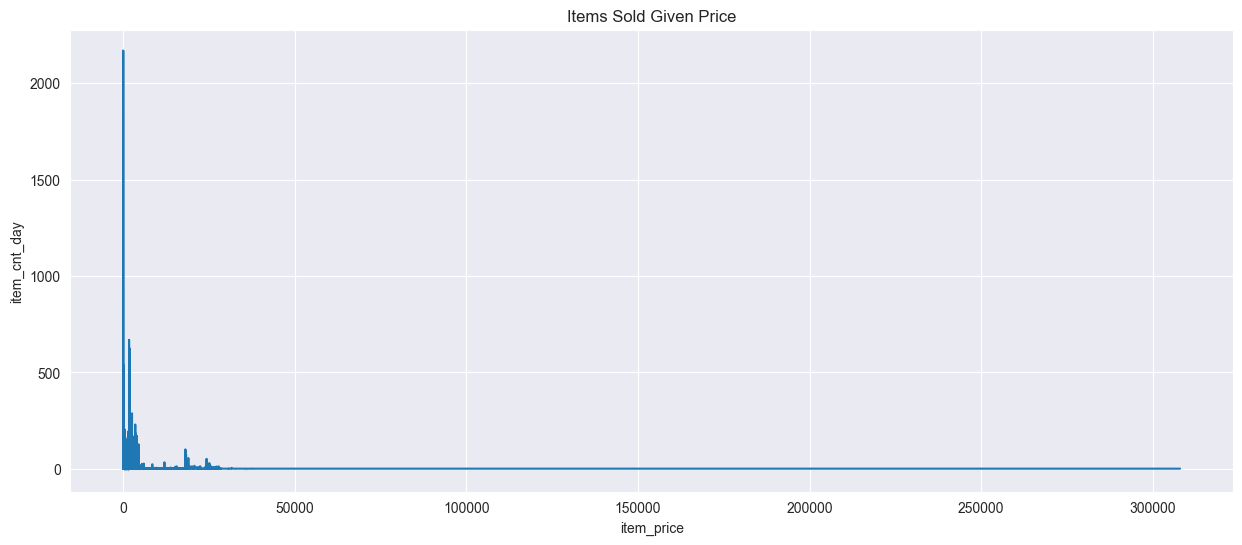

In [10]:
plt.figure(figsize=(15,6))
sns.lineplot(x='item_price',y='item_cnt_day',data=train).set(title='Items Sold Given Price')
plt.show()

In [ ]:
sns.catplot(x='shop_id',y='item_cnt_day',data=df_year,kind='bar',aspect=3)

Checking for null values:

<AxesSubplot:>

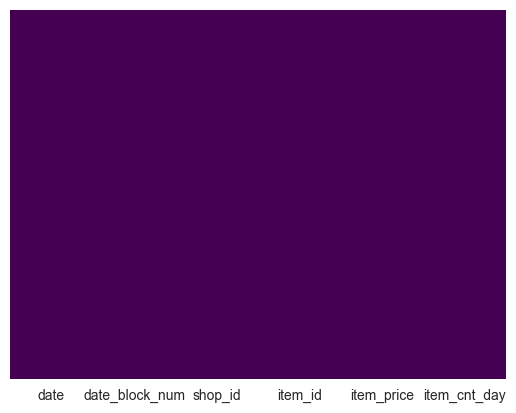

In [11]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap = 'viridis')

We can see that there are not null values

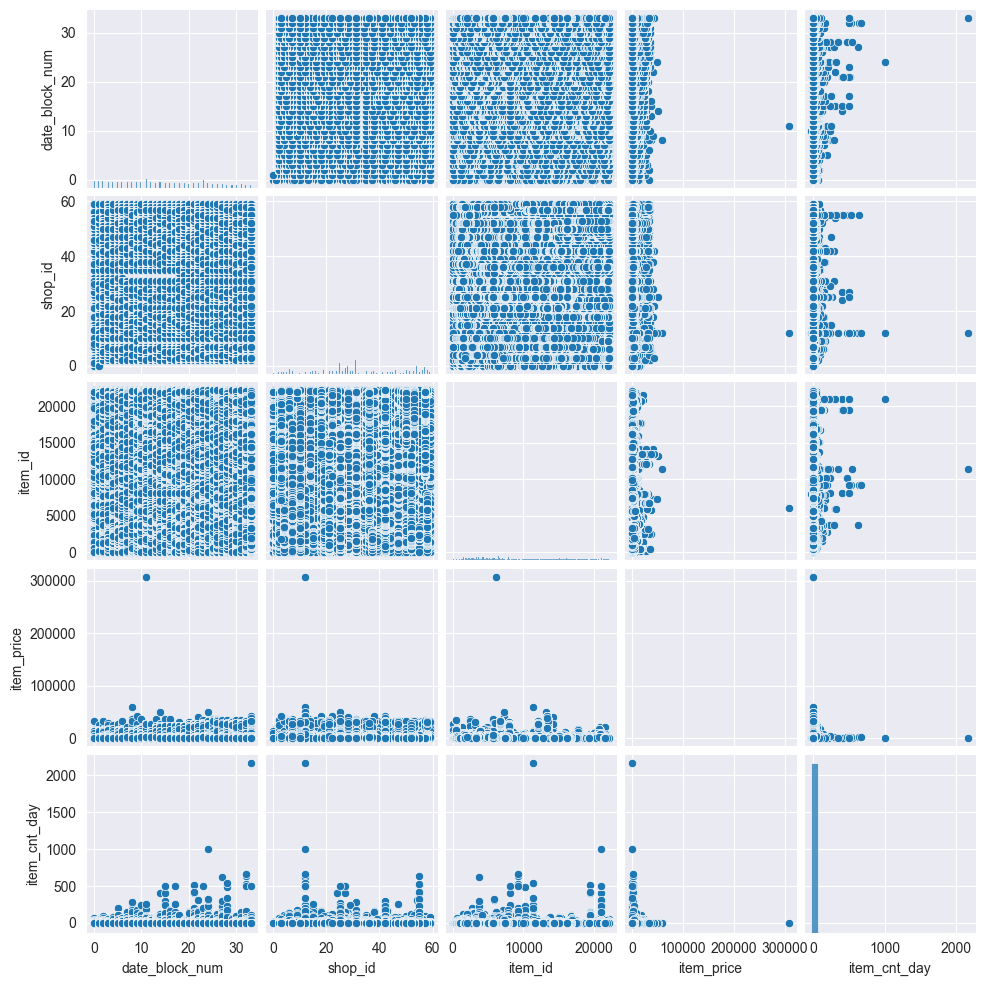

In [13]:
sns.pairplot(train,height=2);